In [15]:
from multiprocessing import Process, Queue
import glob
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import math as m
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

In [16]:
fuel = pd.read_csv('Fuel Efficiciency/Fuel_FO_2010-17.csv', sep = ';',index_col=None,encoding='latin-1')
fuel.head(100)


IN  Train_Bulletin Sector  DateTime1  Id_Loc  Track_id  Id_Engineer  \
0   TREN           32175      N  26/4/2017    5409         1         67.0   
1   TREN           32177      N  26/4/2017      11         1        104.0   
2   TREN           32178      N  26/4/2017    5409         1         67.0   
3   TREN           32187      N  27/4/2017    6931         1         18.0   
4   TREN           32188      N  27/4/2017      21         1         72.0   
5   TREN           32190      N  27/4/2017      21         1         72.0   
6   TREN           32207      N  28/4/2017      22         1         14.0   
7   TREN           32215      N  28/4/2017      22         1         14.0   
8   TREN           32238      N  30/4/2017    6587         1         65.0   
9   TREN           32241      N  30/4/2017      11         1         39.0   
10  TREN           32242      N  30/4/2017    6587         1         65.0   
11  TREN           32244      N   1/5/2017      24         1         88.0   
12  TREN           32252      N   1/5/2017       9         1         85.0   
13  TREN           32257      N   2/5/2017       9         1         67.0   
14  TREN           32261      N   2/5/2017    6586         1        111.0   
15  TREN           32266      N   3/5/2017    6586         1        111.0   
16  TREN           32271      N   3/5/2017      18         1         26.0   
17  TREN           32272      N   3/5/2017      18         1         26.0   
18  TREN           32275      N   3/5/2017       4         1         12.0   
19  TREN           32285      N   4/5/2017       4         1         12.0   
20  TREN           32289      N   4/5/2017    6931         1         88.0   
21  TREN           32290      N   4/5/2017    6931         1         88.0   
22  TREN           32295      N   4/5/2017       8         1         14.0   
23  TREN           32298      N   5/5/2017       8         1         14.0   
24  TREN           32299      N   5/5/2017      14         1         64.0   
25  TREN           32308      N   5/5/2017       5         1         33.0   
26  TREN           32311      N   6/5/2017       5         1         33.0   
27  TREN           32317      N   6/5/2017       5         1         68.0   
28  TREN           32322      N   7/5/2017       5         1         68.0   
29  TREN           32323      N   6/5/2017    6931         1         98.0   
..   ...             ...    ...        ...     ...       ...          ...   
70  TREN           32164      E  25/4/2017       2         2         38.0   
71  TREN           32164      E  25/4/2017    6180         2         38.0   
72  TREN           32170      E  26/4/2017    5886         2         78.0   
73  TREN           32170      E  26/4/2017    6587         2         78.0   
74  TREN           32172      E  27/4/2017    6691         2         38.0   
75  TREN           32174      E  27/4/2017    6690         2         85.0   
76  TREN           32176      E  27/4/2017       4         2         21.0   
77  TREN           32179      E  26/4/2017       6         2        111.0   
78  TREN           32179      E  26/4/2017       9         2        111.0   
79  TREN           32183      E  28/4/2017      10         2         64.0   
80  TREN           32186      E  27/4/2017       6         2         26.0   
81  TREN           32186      E  27/4/2017    6625         2         26.0   
82  TREN           32195      E  28/4/2017       6         2        114.0   
83  TREN           32195      E  28/4/2017    6691         2        114.0   
84  TREN           32196      E  29/4/2017    6180         2         68.0   
85  TREN           32206      E  28/4/2017    6550         2         33.0   
86  TREN           32209      E  28/4/2017      18         2         38.0   
87  TREN           32213      E  30/4/2017    6587         2         33.0   
88  TREN           32217      E  29/4/2017       6         2         85.0   
89  TREN           32217      E  29/4/2017    6690         2         85.0   
90

In [17]:
fuel.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters            float64
Net_Ton_Km_r      float64
Gross_Ton_km        int64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type         int64
Sub_Type           object
id_Type             int64
Type               object
Traccion           object
Direction           int64
Id_Model_Loc        int64
Model_Loc          object
UTC                object
GTK_T             float64
Net_Ton_Km        float64
dtype: object

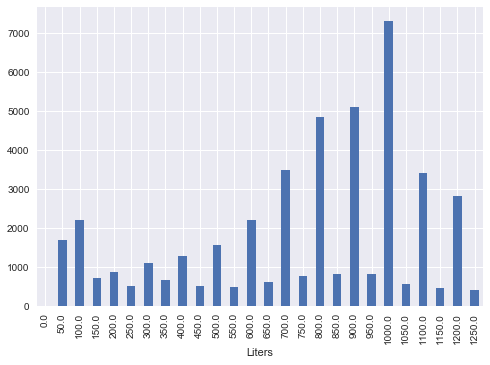

In [18]:
f = fuel
# Filter out Shunting Locomotives, choose only consumption between 40 and 1300 liters and postive GTK
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN') & (f.Gross_Ton_km >0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


In [19]:
#Doesnt work f = fuel
# Replace NaN with 0
#f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']] = f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']].fillna(0, inplace= True)
# Cast the following columns as float
#f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']] = f[['Hours','Kilometers','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']].astype(float)

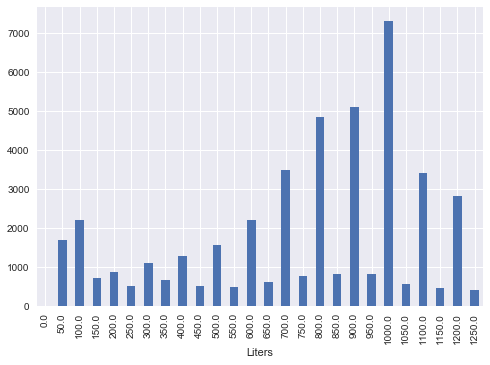

In [20]:
f = fuel
f.fillna(0, inplace= True)
# Filter Shunting Locomotives, choose only consumption between 40 and 1300 liters and postivo GTK
f = f[(f.Liters >40.0) & (f.Liters < 1300.0) & (f.IN == 'TREN') & (f.Gross_Ton_km >0.0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


In [21]:
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
f.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters            float64
Net_Ton_Km_r      float64
Gross_Ton_km        int64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type         int64
Sub_Type           object
id_Type             int64
Type               object
Traccion           object
Direction           int64
Id_Model_Loc        int64
Model_Loc          object
UTC                object
GTK_T             float64
Net_Ton_Km        float64
Lts_x_GTK         float64
dtype: object

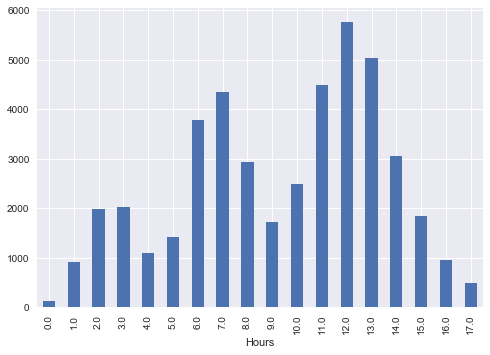

In [23]:
f = f[(f.Hours < 18.0)]
f.groupby(f.Hours // 1 ).size().plot(kind='bar')

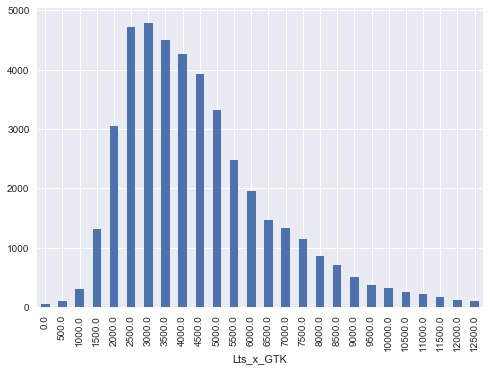

In [24]:
f = f[(f.Lts_x_GTK < 13000.0)]
f.groupby(f.Lts_x_GTK // 500*500 ).size().plot(kind='bar')


In [25]:
# percentaje of observations including shunting
len(f)/len(fuel)

0.6473535476972428

In [26]:
z = fuel
z = z[(z.Gross_Ton_km <=0)]
len(z)

3391

In [27]:
# percentaje of observations excluding GTK < 0
len(f)/(len(fuel)-len(z))

0.682717401810742

In [28]:
len(fuel)

65465

In [29]:
f.Type.value_counts()

CARGA         40910
ESPECIALES     1469
Name: Type, dtype: int64

In [30]:
f.Sub_Type.value_counts()

CARGA GENERAL            32347
DERIVADOS DE PETROLEO     8563
SERVICIO INTERNO          1014
LOCOMOTORA SOLA            416
SOCORRO                     39
Name: Sub_Type, dtype: int64

In [31]:
f.Model_Loc.value_counts()

GE U20C      28921
GM            5790
GE U10B       3920
GE C23EMP     3721
HM              26
FB               1
Name: Model_Loc, dtype: int64

In [32]:
f.Locomotive.value_counts()

2010    2648
2006    2579
2009    2522
2004    2493
2002    2372
2003    2323
2005    2276
2000    2168
2001    2146
2007    2042
2011    1880
2012    1470
1201    1456
1203    1431
2008    1397
1602    1077
1601     940
1202     882
2301     719
2302     642
2201     605
2303     595
974      573
2305     516
972      512
973      490
977      484
2304     442
2307     420
979      412
976      393
2306     387
971      354
978      348
975      331
1014      26
966       23
8689       4
331        1
Name: Locomotive, dtype: int64

In [33]:
f.Sector.value_counts()

E    36824
N     3899
S     1656
Name: Sector, dtype: int64

In [34]:
f.Direction.value_counts()

0    21631
1    20748
Name: Direction, dtype: int64

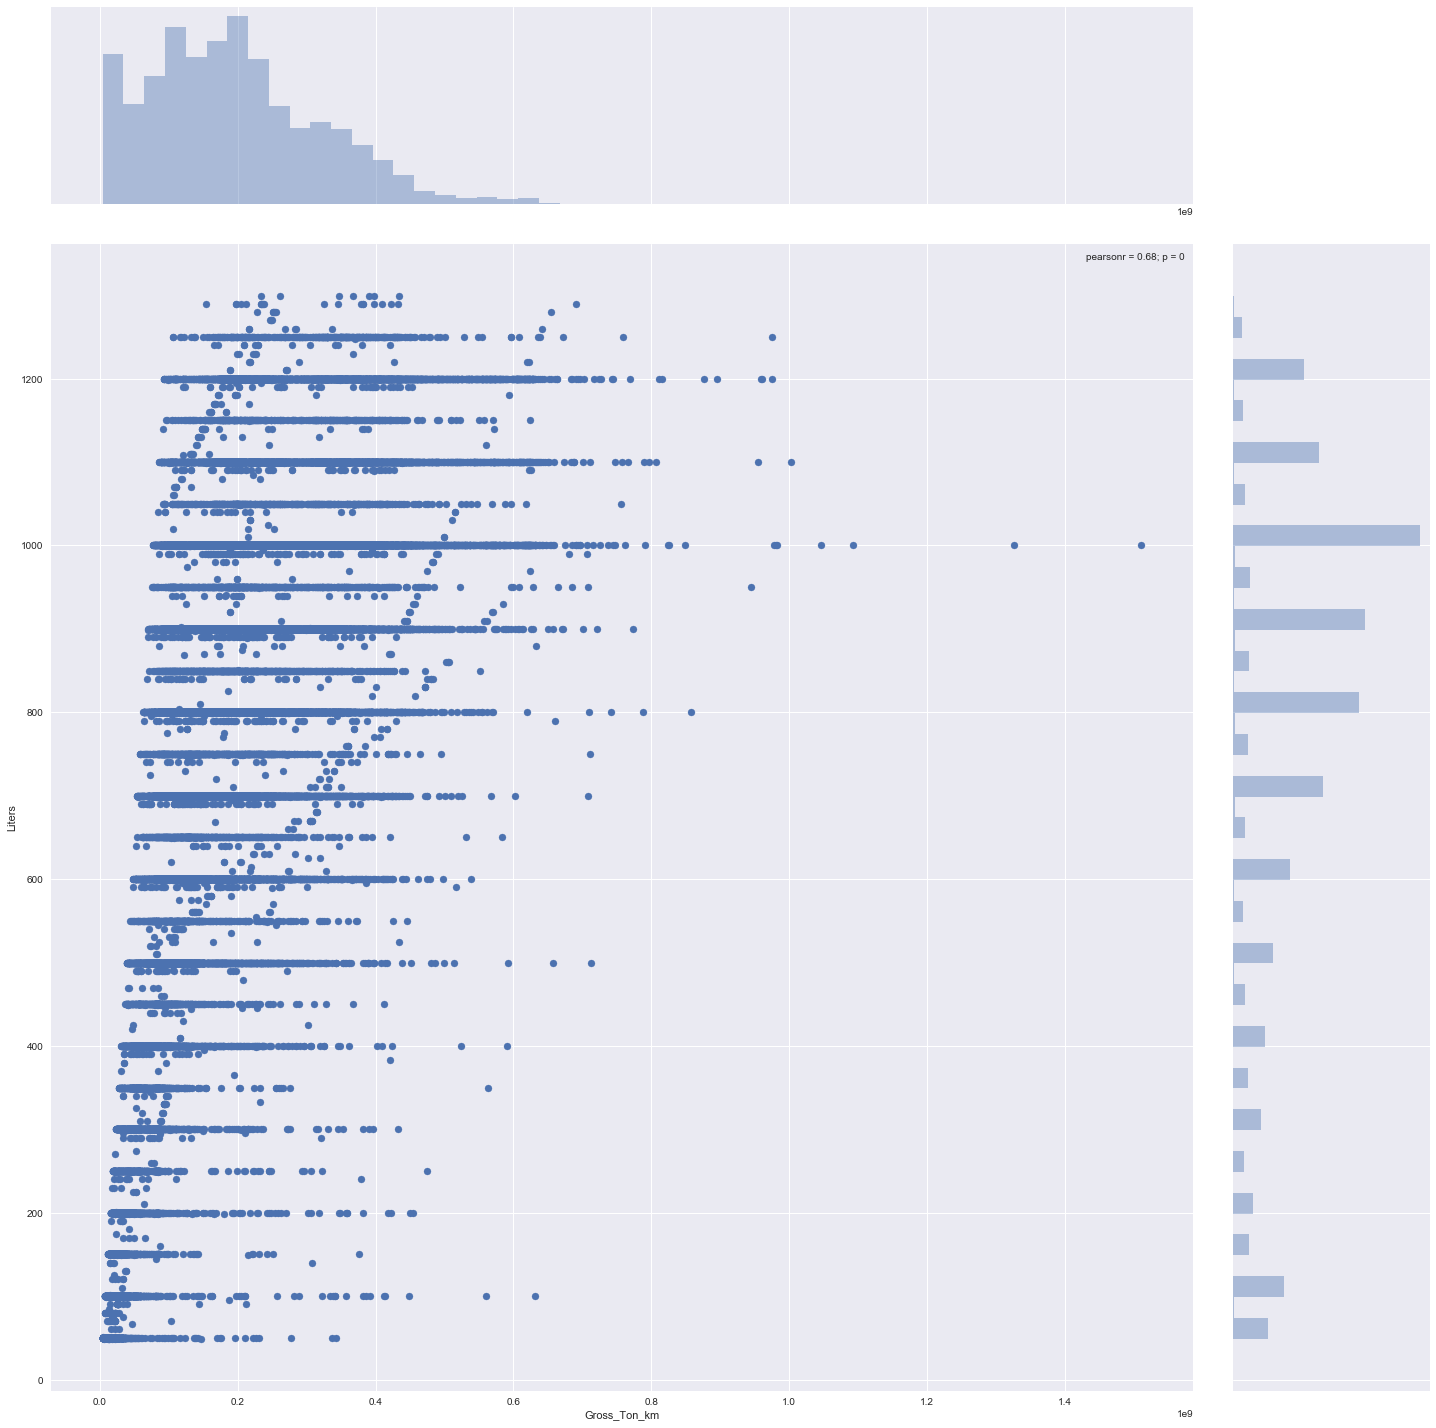

In [35]:
# Show the whole data distribution with a  joint
sns.jointplot(x="Gross_Ton_km", y="Liters", data=f, size=20)

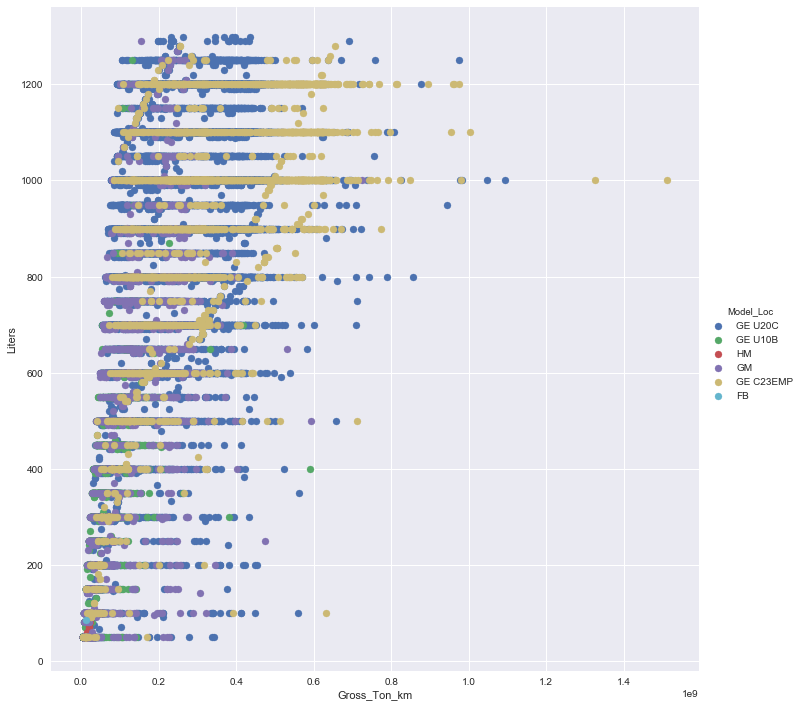

In [36]:
# We'll use seaborn's FacetGrid to color the scatterplot by Locomotive Type
sns.FacetGrid(f, hue="Model_Loc", size=10) \
   .map(plt.scatter, "Gross_Ton_km", "Liters") \
   .add_legend()


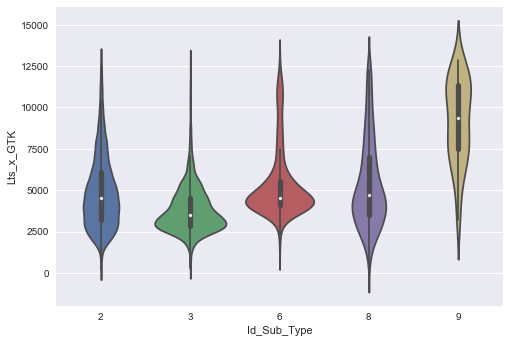

In [37]:
# A violin plot 
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Id_Sub_Type", y="Lts_x_GTK", data=f, size=60)

In [38]:
cols = list(f.loc[:,'Id_Sub_Type':'Sub_Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km']
g= f[cols]
# Show the mean grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).mean()

Hours  Kilometers      Liters  \
Id_Sub_Type Sub_Type                                                   
2           CARGA GENERAL           9.985212  185.013293  762.356633   
3           DERIVADOS DE PETROLEO  10.620675  209.411538  811.128109   
6           LOCOMOTORA SOLA         6.440865  164.369231  265.360577   
8           SERVICIO INTERNO        6.800020  137.897436  402.209073   
9           SOCORRO                 5.682564  124.523077  146.153846   

                                     Lts_x_GTK  Gross_Ton_km  
Id_Sub_Type Sub_Type                                          
2           CARGA GENERAL          4903.181263     192955078  
3           DERIVADOS DE PETROLEO  3824.315066     237194234  
6           LOCOMOTORA SOLA        5375.613078      55500396  
8           SERVICIO INTERNO       5408.715481      97800927  
9           SOCORRO                9155.171897      17466889

In [39]:
# Show the standard deviation grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).std()

Hours  Kilometers      Liters  \
Id_Sub_Type Sub_Type                                                  
2           CARGA GENERAL          4.053492   76.187140  333.693685   
3           DERIVADOS DE PETROLEO  2.944588   59.100755  225.059035   
6           LOCOMOTORA SOLA        2.694285   95.113782  145.691934   
8           SERVICIO INTERNO       4.097212   76.343172  334.580112   
9           SOCORRO                3.350215   81.109612  106.613305   

                                     Lts_x_GTK  Gross_Ton_km  
Id_Sub_Type Sub_Type                                          
2           CARGA GENERAL          2221.343134  1.325786e+08  
3           DERIVADOS DE PETROLEO  1456.203639  9.294889e+07  
6           LOCOMOTORA SOLA        2063.964869  3.513081e+07  
8           SERVICIO INTERNO       2681.770895  9.893599e+07  
9           SOCORRO                2495.455181  1.347774e+07

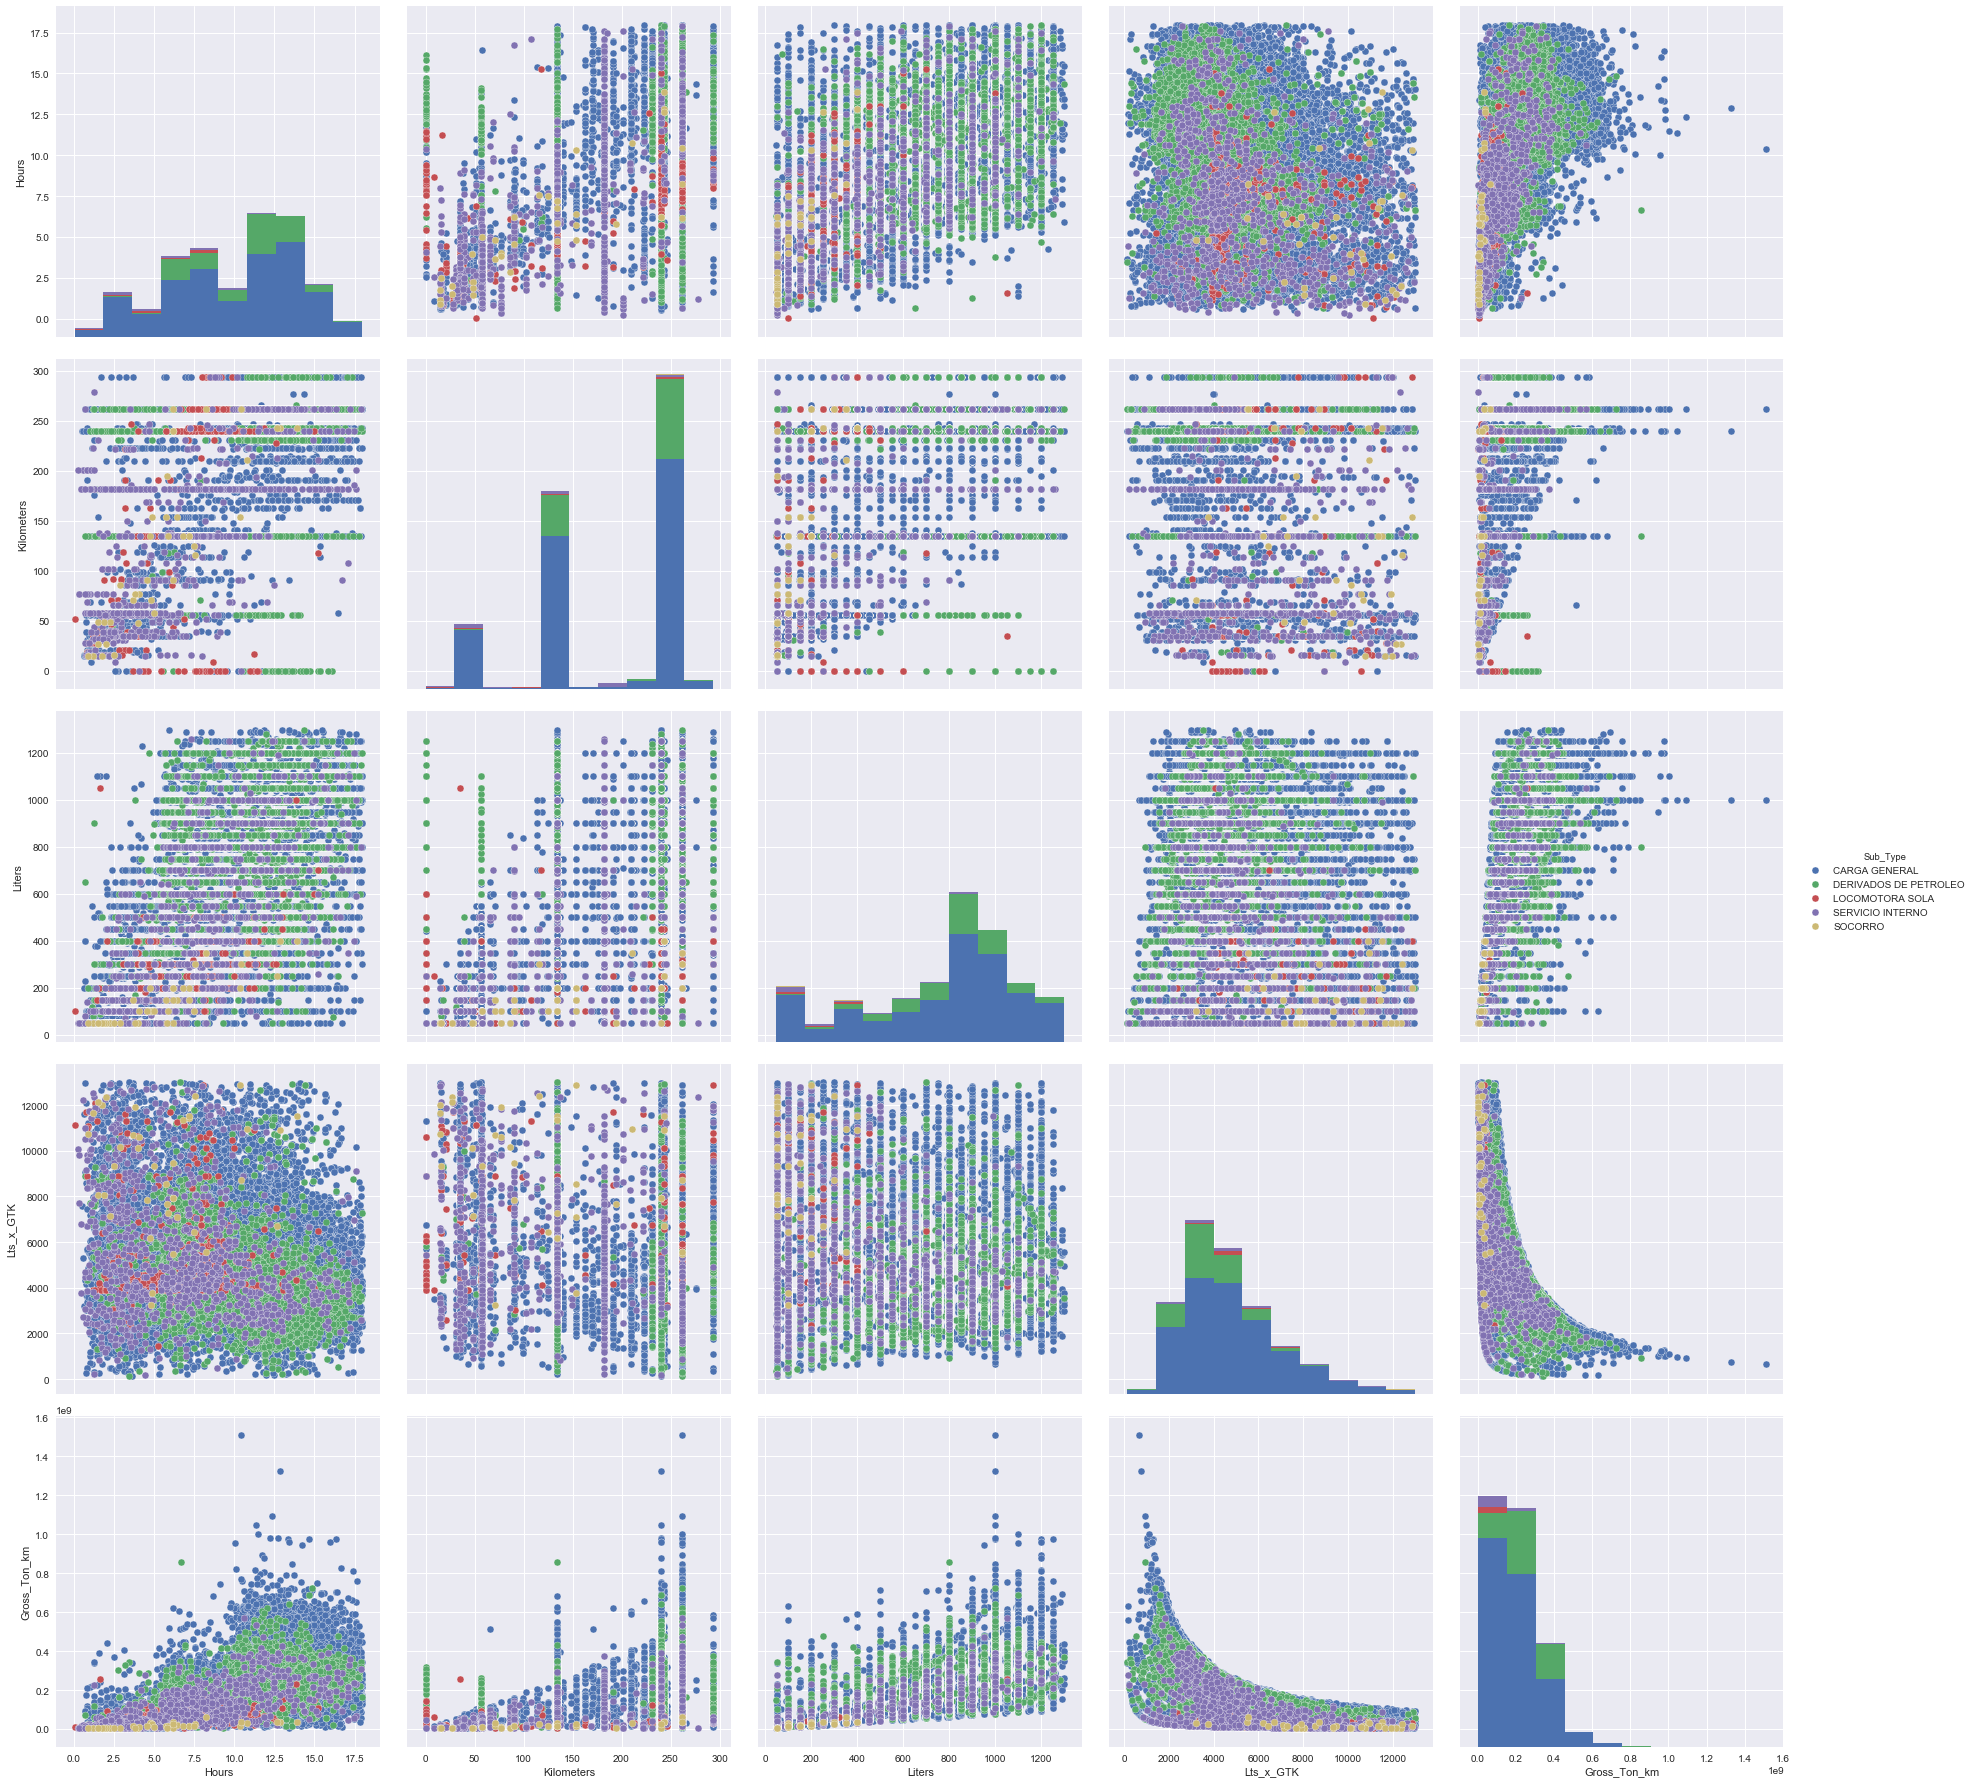

In [40]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(g.drop("Id_Sub_Type", axis=1), hue="Sub_Type", size=5)

In [41]:
# Don't take into account special trains - Short distance
f = f[(f.id_Type != 2.0)]

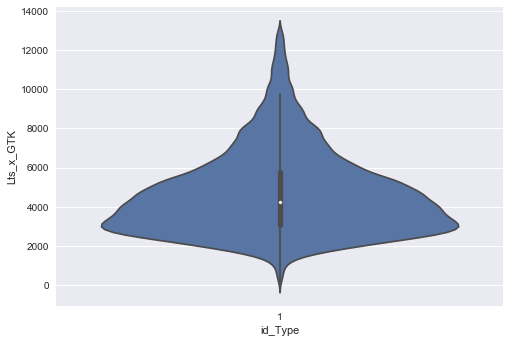

In [42]:
# A violin plot 
# Let's reduce the division to type of train
sns.violinplot(x="id_Type", y="Lts_x_GTK", data=f, size=60)

In [43]:
cols = list(f.loc[:,'id_Type':'Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km']
gtype= f[cols]
# Show the mean grouped by type of train
gtype.groupby(['id_Type', 'Type']).mean()

Hours  Kilometers      Liters    Lts_x_GTK  Gross_Ton_km
id_Type Type                                                               
1       CARGA  10.118223  190.120166  772.565143  4677.360406     202214914

In [44]:
# Show the standard deviation grouped by type of train
gtype.groupby(['id_Type', 'Type']).std()

Hours  Kilometers      Liters    Lts_x_GTK  Gross_Ton_km
id_Type Type                                                              
1       CARGA  3.856561   73.614264  314.703542  2130.250303  1.266096e+08

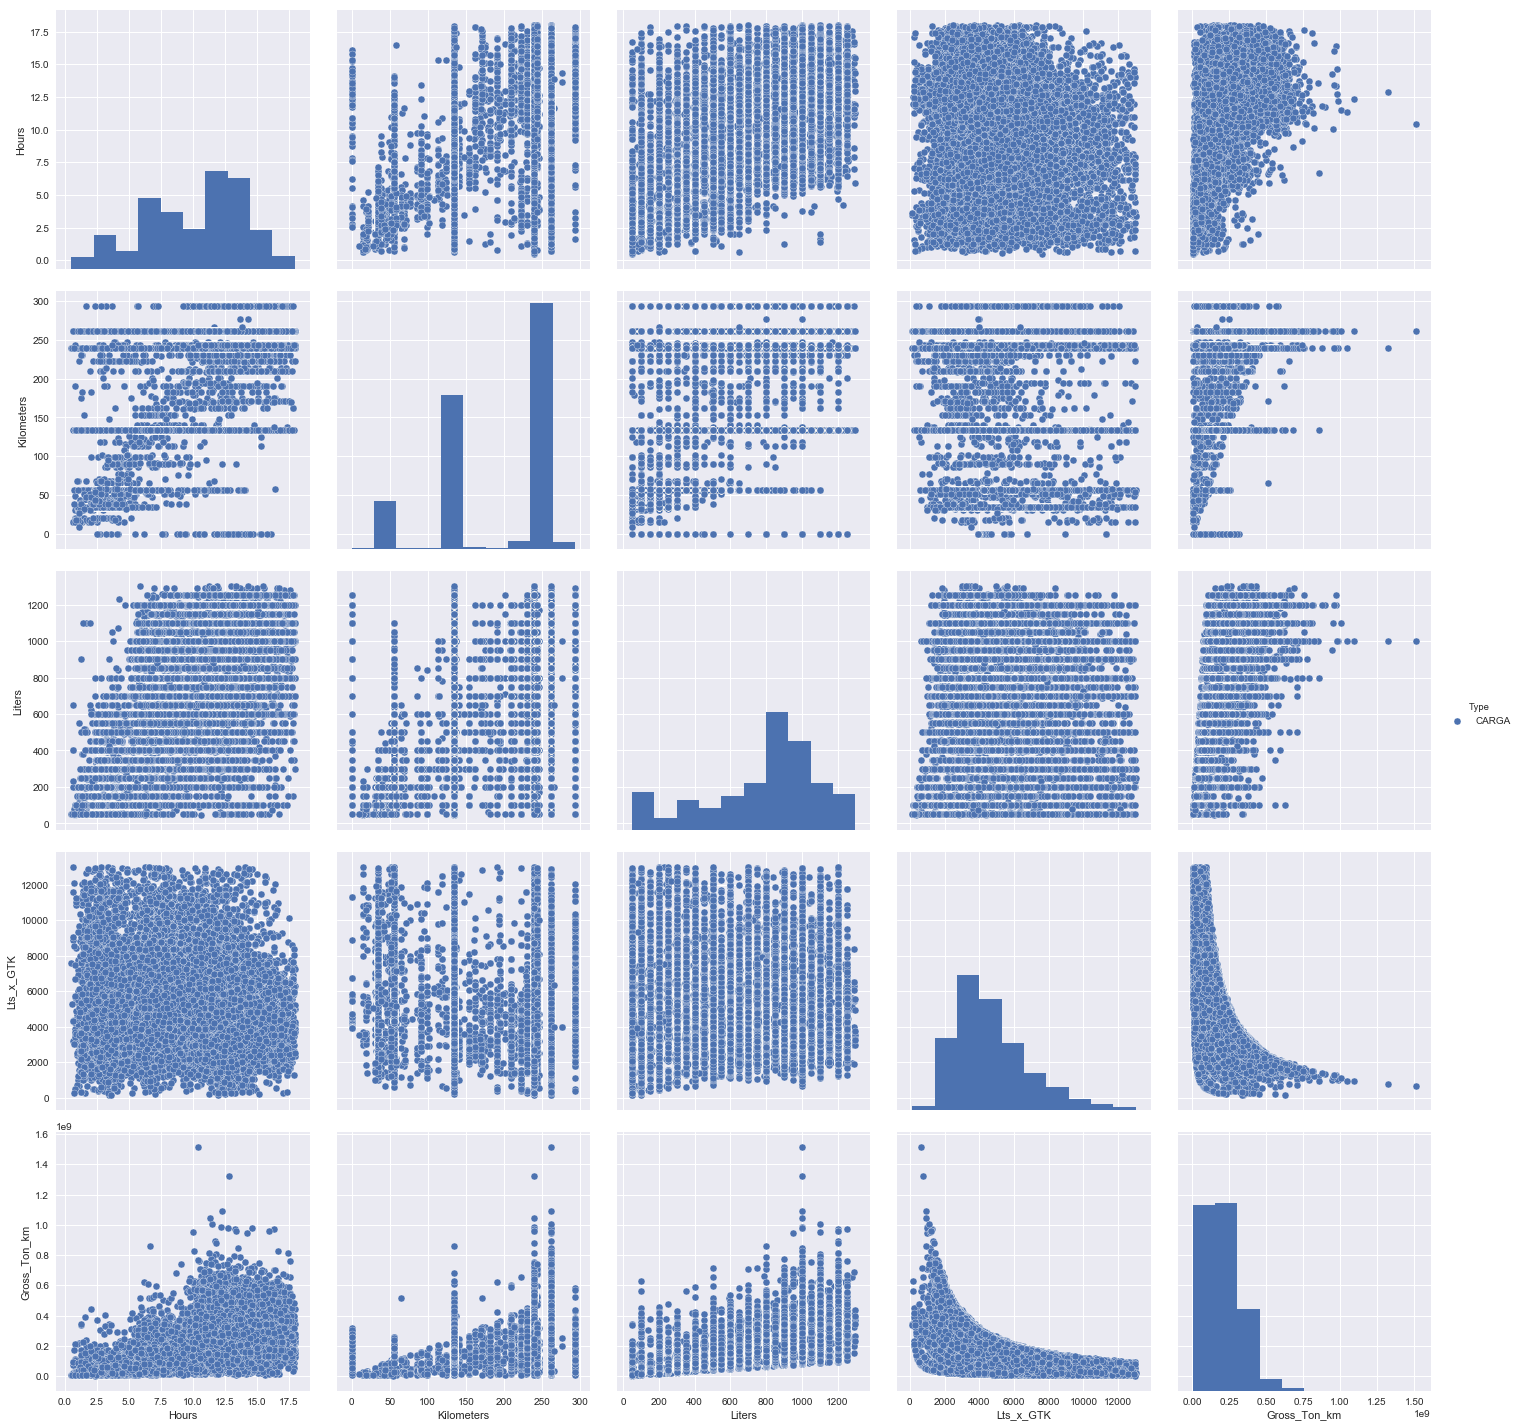

In [45]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtype.drop("id_Type", axis=1), hue="Type", size=4)

In [46]:
# Only take into account Freight Trainas
f = f[(f.id_Type == 1.0)]

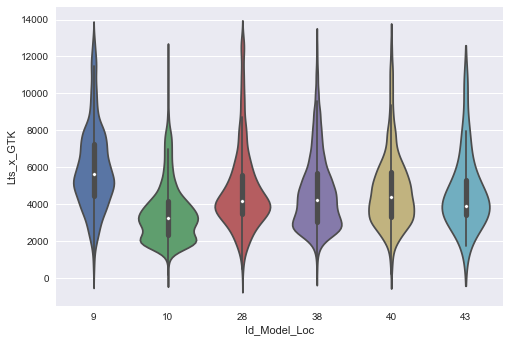

In [47]:
# A violin plot 
# Let's reduce the division to locomotive model
sns.violinplot(x="Id_Model_Loc", y="Lts_x_GTK", data=f, size=60)

In [48]:
cols = list(f.loc[:,'Id_Model_Loc':'Model_Loc']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km']
gmodel= f[cols] 
# Show the mean grouped by type of train
gmodel.groupby(['Id_Model_Loc', 'Model_Loc']).mean()

Hours  Kilometers      Liters    Lts_x_GTK  \
Id_Model_Loc Model_Loc                                                   
9            GE U10B     7.407562  150.942785  324.427291  5985.022848   
10           GE C23EMP  10.555884  199.795873  931.158498  3531.308441   
28           GM          6.866327  123.255123  430.692065  4779.933958   
38           GE U20C    10.848962  202.598648  860.714794  4634.615749   
40           GM          8.344554  156.676901  547.635358  4776.911758   
43           HM          2.032381   34.166667   82.380952  4659.781668   

                        Gross_Ton_km  
Id_Model_Loc Model_Loc                
9            GE U10B        61693067  
10           GE C23EMP     320589845  
28           GM            102559147  
38           GE U20C       220690302  
40           GM            133321205  
43           HM             19537842

In [49]:
# Show the standard deviation grouped by type of train
gmodel.groupby(['Id_Model_Loc', 'Model_Loc']).std()

Hours  Kilometers      Liters    Lts_x_GTK  \
Id_Model_Loc Model_Loc                                                  
9            GE U10B    4.185833   93.459708  216.218133  2286.768091   
10           GE C23EMP  3.378118   63.837262  226.115371  1615.707555   
28           GM         4.210498   83.224181  310.165226  2254.808049   
38           GE U20C    3.422040   63.114268  247.797306  2074.688230   
40           GM         4.300196   87.228475  312.221319  2069.171694   
43           HM         0.525889    4.277071   43.920925  1975.704132   

                        Gross_Ton_km  
Id_Model_Loc Model_Loc                
9            GE U10B    4.824127e+07  
10           GE C23EMP  1.661981e+08  
28           GM         8.216454e+07  
38           GE U20C    1.101783e+08  
40           GM         8.931232e+07  
43           HM         9.336546e+06

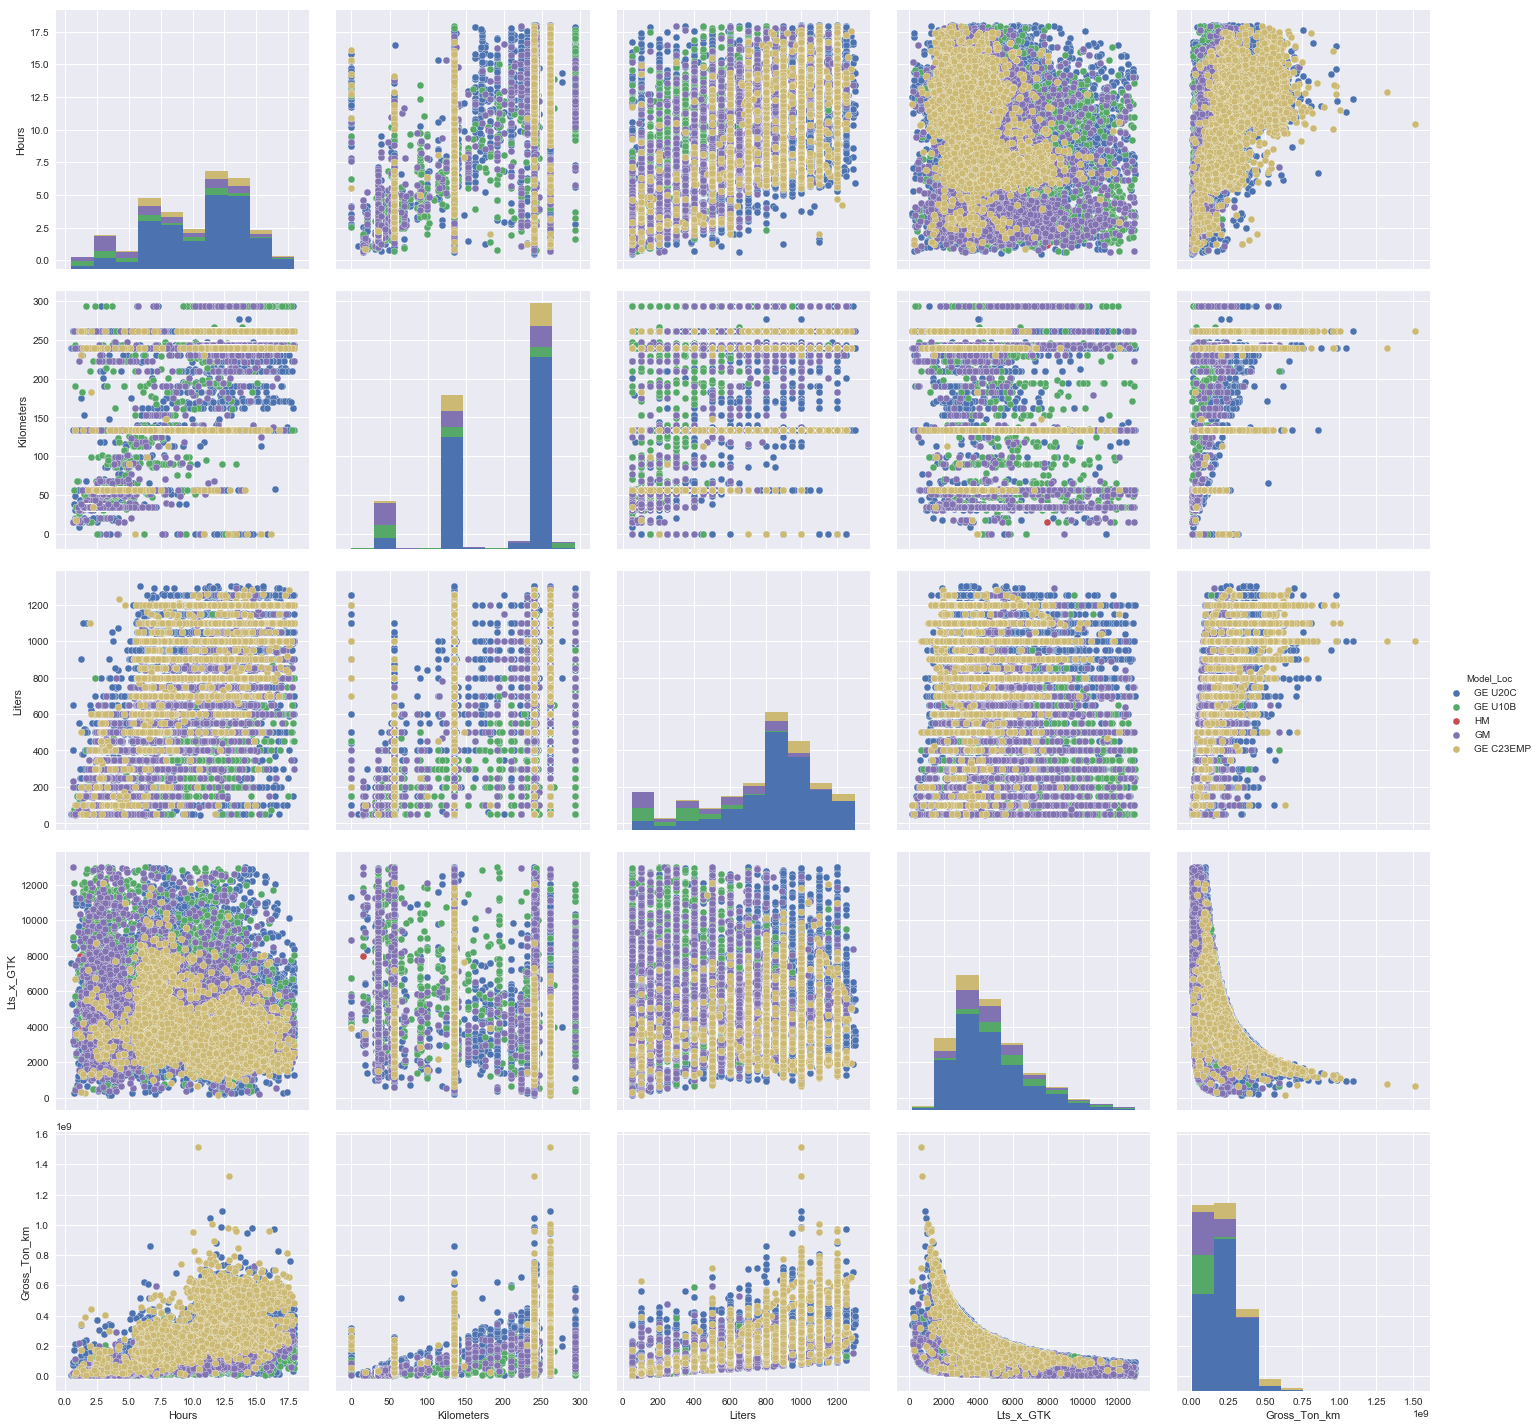

In [50]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gmodel.drop("Id_Model_Loc", axis=1), hue="Model_Loc", size=4)

In [51]:
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f.fillna(0, inplace= True)
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN')]

# Only take into account Freight Trains Single Locomotive
f = f[(f.id_Type == 1.0) & (f.Traccion == 'S')]
# Only take into account General Cargo Freight Trains, U20 Locomotives, originating in Santa Cruz going to Quijarro
f = f[(f.Id_Sub_Type == 2.0) & (f.Id_Model_Loc== 10) & (f.Direction == 0.0) & (f.UTC == 'UTR') & (f.Hours < 24) & (f.Gross_Ton_km > 1000.0) & (f.Lts_x_GTK > 0.0) & (f.Lts_x_GTK < 4000.0)  & ((f.Track_id ==2) | (f.Track_id ==3) | (f.Track_id ==4))]
f.head(5)

IN  Train_Bulletin Sector  DateTime1  Id_Loc  Track_id  Id_Engineer  \
66   TREN           32157      E  25/4/2017    6586         2         34.0   
92   TREN           32224      E  29/4/2017    6586         2        111.0   
110  TREN           32277      E   4/5/2017    6586         2         65.0   
137  TREN           32355      E  10/5/2017    6587         2         18.0   
144  TREN           32375      E  11/5/2017    6625         2         67.0   

     Id_fireman  Hours  Kilometers     ...       id_Type   Type  Traccion  \
66        253.0  13.83       261.7     ...             1  CARGA         S   
92        263.0  14.72       261.7     ...             1  CARGA         S   
110        17.0  20.00       261.7     ...             1  CARGA         S   
137       253.0  17.58       261.7     ...             1  CARGA         S   
144        92.0  13.42       261.7     ...             1  CARGA         S   

     Direction  Id_Model_Loc  Model_Loc  UTC        GTK_T   Net_Ton_Km  \
66           0            10  GE C23EMP  UTR  638161442.7  447188078.8   
92           0            10  GE C23EMP  UTR  468128939.7  184390534.4   
110          0            10  GE C23EMP  UTR  612132821.5  385828441.0   
137          0            10  GE C23EMP  UTR  654666759.7  415425103.5   
144          0            10  GE C23EMP  UTR  620077641.2  439837477.9   

       Lts_x_GTK  
66   1958.751996  
92   2029.355416  
110  1976.695182  
137  1955.193204  
144  1967.495551  

[5 rows x 33 columns]

In [52]:
f.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters            float64
Net_Ton_Km_r      float64
Gross_Ton_km        int64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type         int64
Sub_Type           object
id_Type             int64
Type               object
Traccion           object
Direction           int64
Id_Model_Loc        int64
Model_Loc          object
UTC                object
GTK_T             float64
Net_Ton_Km        float64
Lts_x_GTK         float64
dtype: object

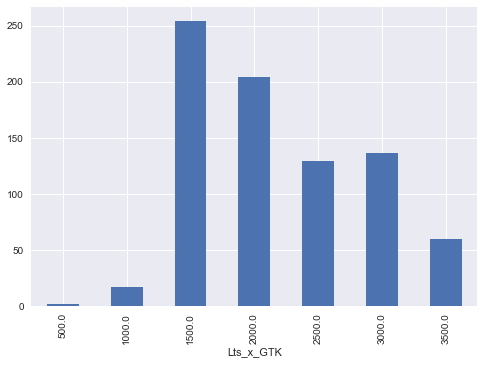

In [53]:
f.groupby((f.Lts_x_GTK // 500*500) ).size().plot(kind='bar')

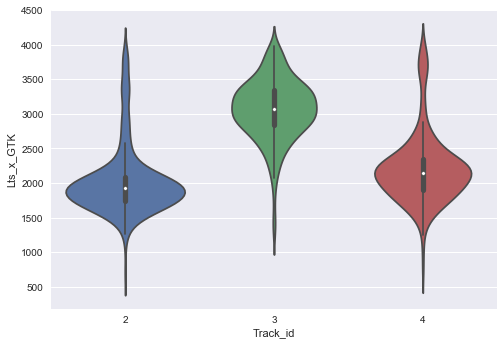

In [54]:
# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f, size=60)

In [55]:
cols =list(f.loc[:,'Track_id':'Track_id']) + list(f.loc[:,'Track':'Track']) +list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km'] 
gtrack= f[cols]
# Show the mean grouped by type of train
gtrack.groupby(['Track_id', 'Track']).mean()

Hours  Kilometers       Liters  \
Track_id Track                                                       
2        SUB DIVISION 2, GU-SJ  13.829892  261.115108  1048.417266   
3        SUB DIVISION 3, SJ-RO   7.346384  134.124723   868.726937   
4        SUB DIVISION 4, RO-CB  13.295375  239.800000  1073.003953   

                                  Lts_x_GTK  Gross_Ton_km  
Track_id Track                                             
2        SUB DIVISION 2, GU-SJ  2027.046698     541739263  
3        SUB DIVISION 3, SJ-RO  3060.475230     287308778  
4        SUB DIVISION 4, RO-CB  2210.826887     506553516

In [56]:
# Show the standard deviation grouped by type of train
gtrack.groupby(['Track_id', 'Track']).std()

Hours  Kilometers      Liters   Lts_x_GTK  \
Track_id Track                                                                 
2        SUB DIVISION 2, GU-SJ  1.783657    9.752100  143.543395  499.670105   
3        SUB DIVISION 3, SJ-RO  1.057236    1.239212  158.511430  442.762645   
4        SUB DIVISION 4, RO-CB  1.825026    0.000000  141.310715  514.558483   

                                Gross_Ton_km  
Track_id Track                                
2        SUB DIVISION 2, GU-SJ  1.181589e+08  
3        SUB DIVISION 3, SJ-RO  5.374538e+07  
4        SUB DIVISION 4, RO-CB  1.124299e+08

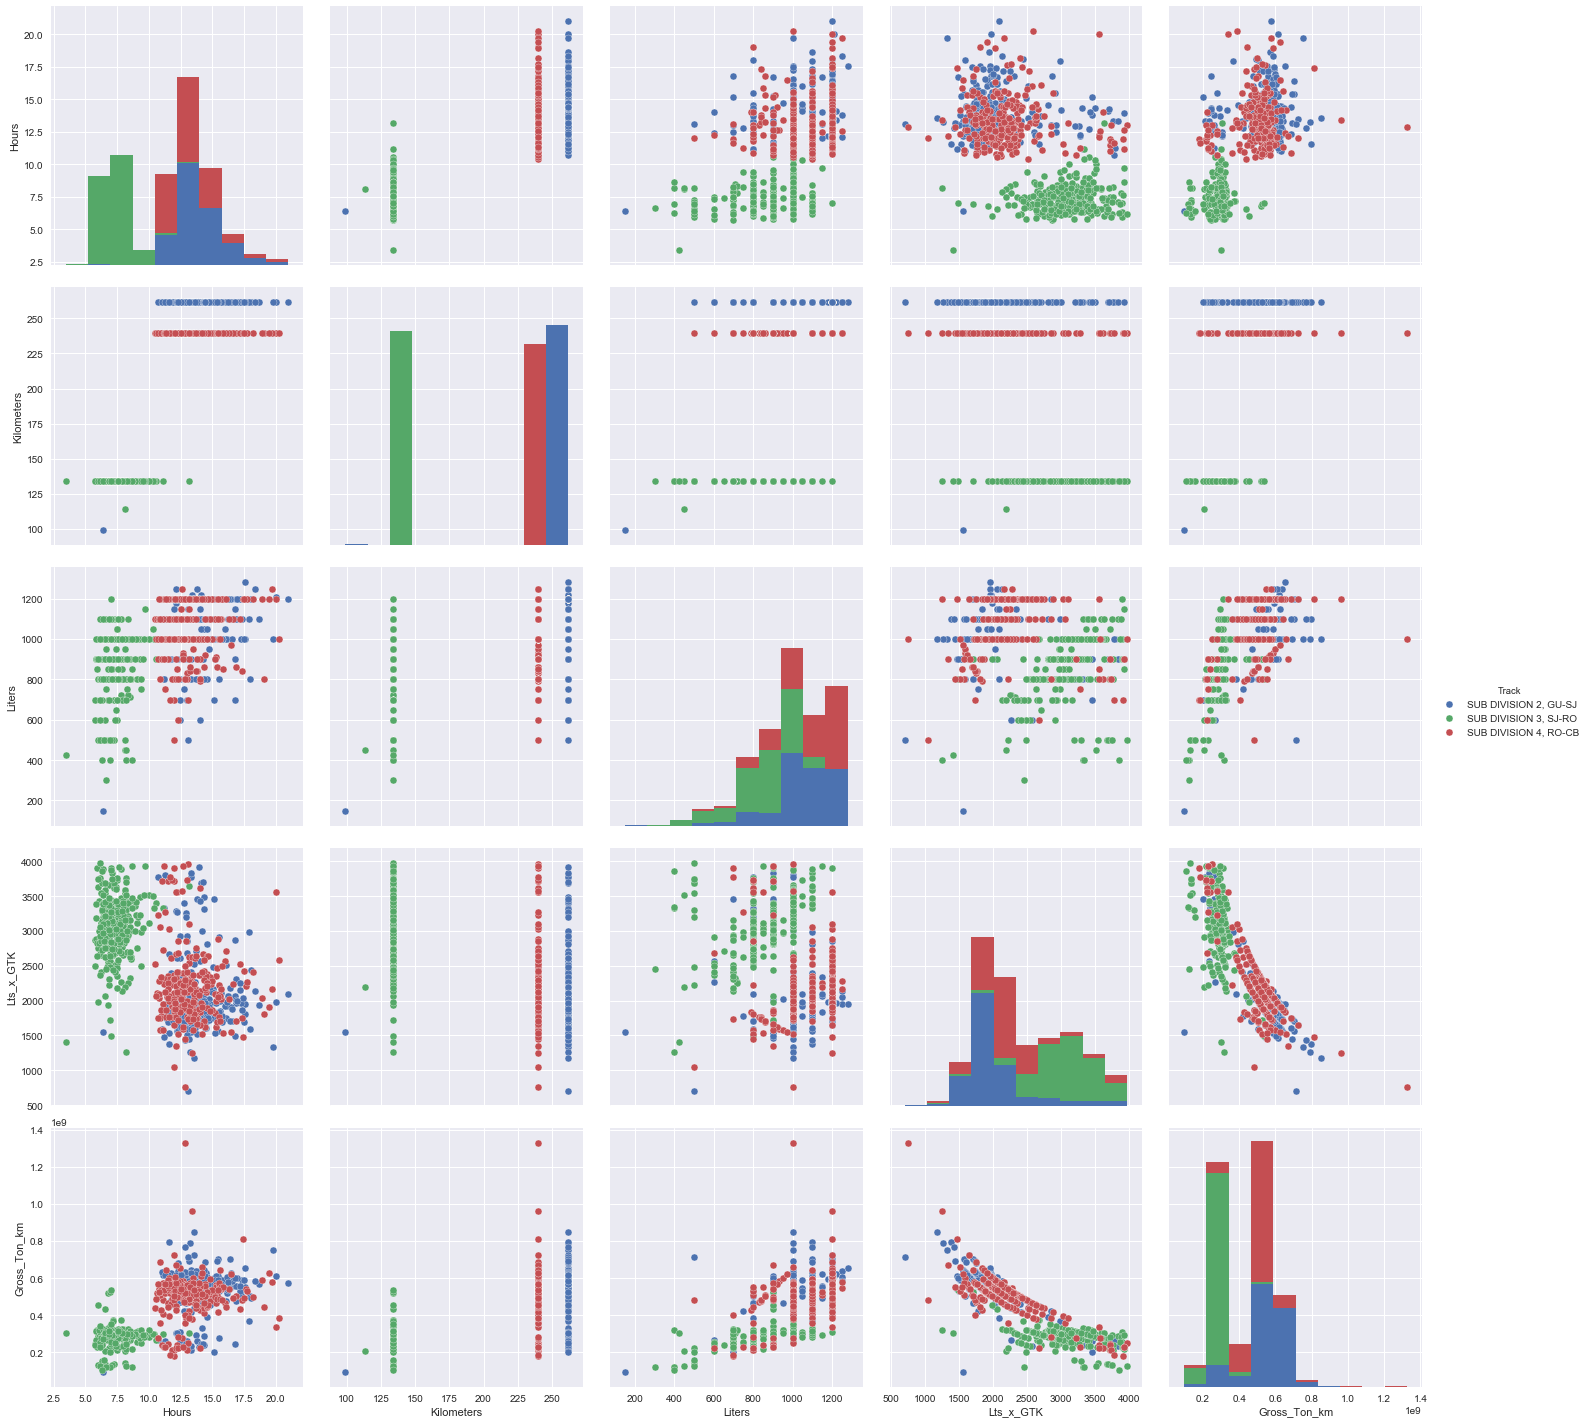

In [57]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtrack.drop("Track_id", axis=1), hue="Track", size=4)

In [58]:
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)

f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN')]
f.fillna(0, inplace= True)      
# Only take into account Freight Trains Single Locomotive
f = f[(f.id_Type == 1.0) & (f.Traccion == 'S')]
# Only take into account General Cargo Freight Trains, U20 Locomotives, originating in Santa Cruz going to Quijarro
f = f[(f.Id_Sub_Type == 2.0) & (f.Id_Model_Loc== 10) & (f.UTC == 'UTR') & (f.Direction == 1.0) & (f.Gross_Ton_km > 0.0) & (f.Lts_x_GTK > 1000.0) & (f.Lts_x_GTK < 4000.0)  & (f.Hours < 24)   & ((f.Track_id ==2) | (f.Track_id ==3) | (f.Track_id ==4))]
f.head(5)


C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


IN  Train_Bulletin Sector  DateTime1  Id_Loc  Track_id  Id_Engineer  \
75   TREN           32174      E  27/4/2017    6690         2         85.0   
87   TREN           32213      E  30/4/2017    6587         2         33.0   
108  TREN           32270      E   4/5/2017    6587         2        297.0   
120  TREN           32301      E   6/5/2017    6691         2         72.0   
123  TREN           32312      E   7/5/2017    6586         2        297.0   

     Id_fireman  Hours  Kilometers     ...       id_Type   Type  Traccion  \
75        251.0  14.48       261.7     ...             1  CARGA         S   
87         92.0  14.50       261.7     ...             1  CARGA         S   
108       265.0  12.58       261.7     ...             1  CARGA         S   
120       253.0  12.48       261.7     ...             1  CARGA         S   
123        29.0  13.65       261.7     ...             1  CARGA         S   

     Direction  Id_Model_Loc  Model_Loc  UTC        GTK_T   Net_Ton_Km  \
75           1            10  GE C23EMP  UTR  559984279.5  407118016.1   
87           1            10  GE C23EMP  UTR  571871702.2  278050519.6   
108          1            10  GE C23EMP  UTR  607420156.2  422181832.3   
120          1            10  GE C23EMP  UTR  499117980.2  319610698.6   
123          1            10  GE C23EMP  UTR  514606291.6  239353231.9   

       Lts_x_GTK  
75   2000.056144  
87   1993.454119  
108  1975.568292  
120  2023.569658  
123  2020.962464  

[5 rows x 33 columns]

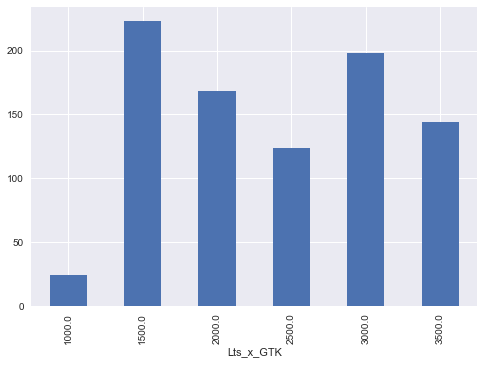

In [59]:
f.groupby((f.Lts_x_GTK // 500*500) ).size().plot(kind='bar')

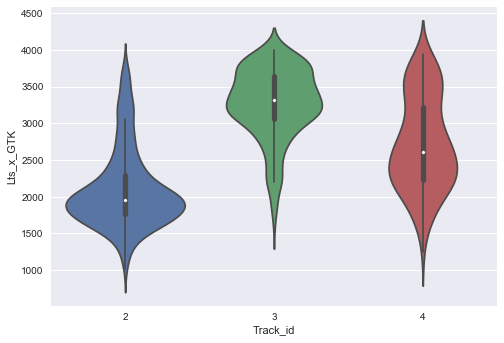

In [60]:
# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f, size=60)

In [61]:
cols =list(f.loc[:,'Track_id':'Track_id']) + list(f.loc[:,'Track':'Track']) +list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km'] 
gtrack= f[cols]
# Show the mean grouped by type of train
gtrack.groupby(['Track_id', 'Track']).mean()

Hours  Kilometers       Liters  \
Track_id Track                                                       
2        SUB DIVISION 2, GU-SJ  12.284660  261.700000  1045.541562   
3        SUB DIVISION 3, SJ-RO   7.828338  134.200000   947.099698   
4        SUB DIVISION 4, RO-CB  14.104967  238.349673  1082.679739   

                                  Lts_x_GTK  Gross_Ton_km  
Track_id Track                                             
2        SUB DIVISION 2, GU-SJ  2097.076954     527701675  
3        SUB DIVISION 3, SJ-RO  3267.895466     295533419  
4        SUB DIVISION 4, RO-CB  2718.180449     423385500

In [62]:
# Show the standard deviation grouped by type of train
gtrack.groupby(['Track_id', 'Track']).std()

Hours  Kilometers      Liters   Lts_x_GTK  \
Track_id Track                                                                 
2        SUB DIVISION 2, GU-SJ  1.591387    0.000000  113.473716  532.469865   
3        SUB DIVISION 3, SJ-RO  1.471989    0.000000  153.561908  482.277793   
4        SUB DIVISION 4, RO-CB  1.884189   17.939552  152.047459  634.307921   

                                Gross_Ton_km  
Track_id Track                                
2        SUB DIVISION 2, GU-SJ  1.301360e+08  
3        SUB DIVISION 3, SJ-RO  6.234377e+07  
4        SUB DIVISION 4, RO-CB  1.233847e+08

In [63]:
# Show the mode grouped by type of train
mode = lambda x: x.mode() if len(x) > 2 else np.array(x)
gtrack.groupby(['Track_id', 'Track']).apply(pd.DataFrame.median).reset_index(drop=True)

Track_id  Hours  Kilometers  Liters    Lts_x_GTK  Gross_Ton_km
0       2.0  12.00       261.7  1000.0  1952.161517   560720733.0
1       3.0   7.58       134.2  1000.0  3314.865983   304737602.0
2       4.0  13.92       239.8  1100.0  2609.404667   425154741.0

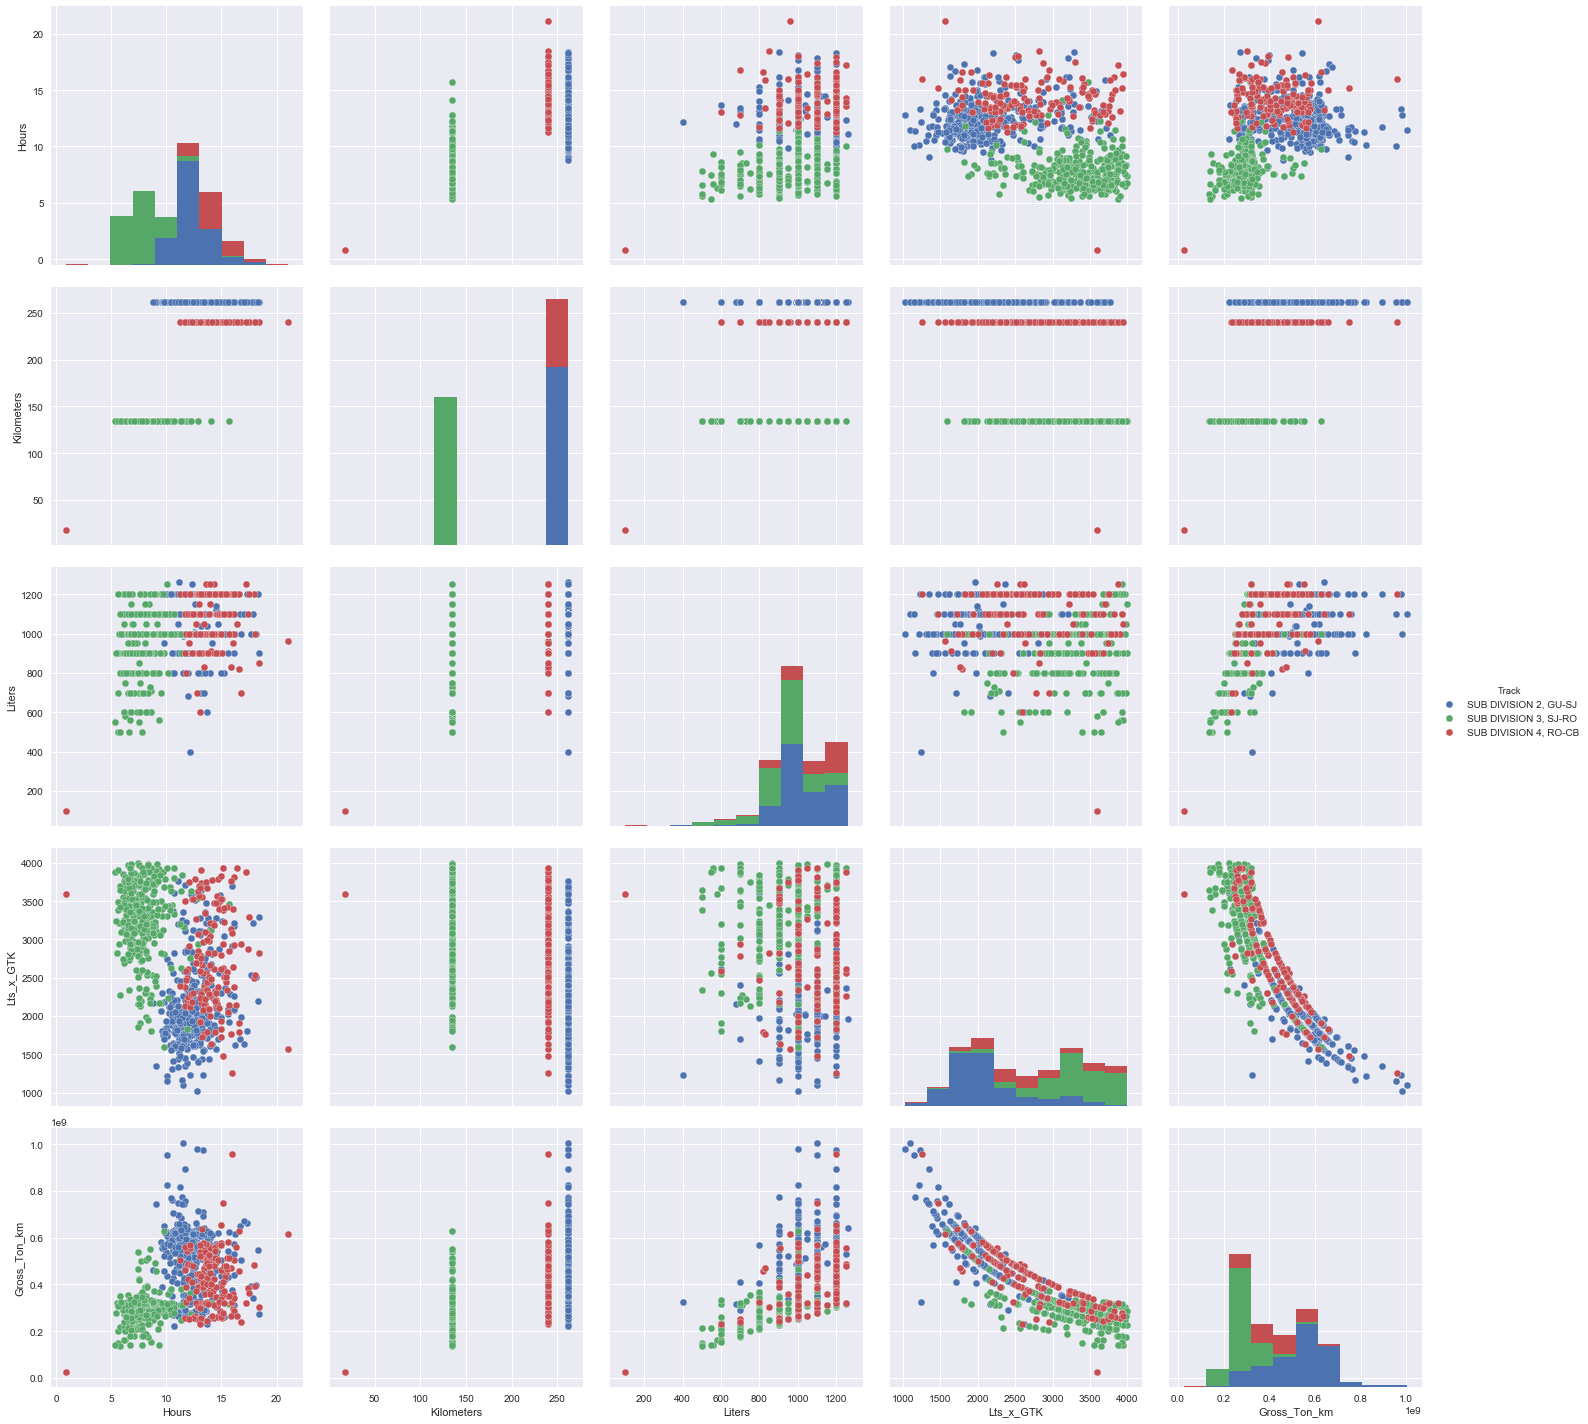

In [64]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtrack.drop("Track_id", axis=1), hue="Track", size=4)

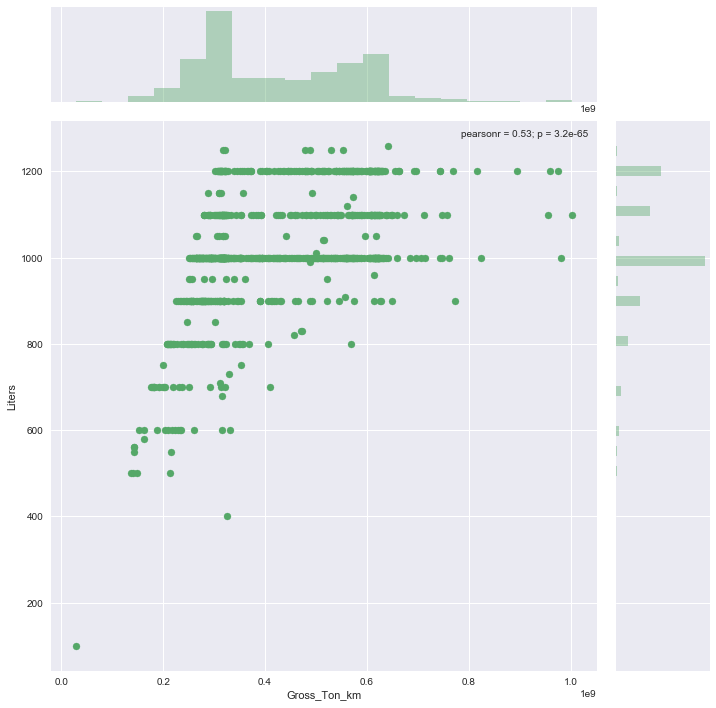

In [65]:
# Show the whole data distribution with a  joint
sns.jointplot(x="Gross_Ton_km", y="Liters", color = "g", data=gtrack, size=10)